Categorical Cross Entropy Derivative

In [2]:
import numpy as np
import torch
import torch.nn.functional as F

In [3]:
# formula for cross entropy = -log(y_hatk) where k is 
# index of true probability

-np.log(1), - np.log(0.0000001)

(-0.0, 16.11809565095832)

In [4]:
def softmax(logits):
    return np.exp(logits)/np.exp(logits).sum()
def cross_entropy(probs, target):
    return -np.log(probs[target])

In [5]:
p = np.array([0.1, 0.2 ,0.4, 0.3])
cross_entropy(p, 1)

1.6094379124341003

In [6]:
p = torch.tensor([[0.1, 0.2 ,0.4, 0.3]])
p.requires_grad = True
target = torch.tensor([1])
loss = F.nll_loss(torch.log(p), target)
loss.backward()

In [7]:
p.grad

tensor([[ 0., -5.,  0.,  0.]])

In [8]:
-F.one_hot(target, num_classes=4)/p

tensor([[ 0., -5.,  0.,  0.]], grad_fn=<DivBackward0>)

Softmax

In [65]:
b = torch.tensor([1,2,3,4.0])
b.requires_grad = True
out = F.softmax(b, dim = 0)
aa = out.sum()
aa.backward()
out

tensor([0.0321, 0.0871, 0.2369, 0.6439], grad_fn=<SoftmaxBackward0>)

In [23]:
from torch.autograd.functional import jacobian

In [26]:
jac  = jacobian(F.softmax, b)

/Users/vrindavan/Library/Python/3.9/lib/python/site-packages/torch/autograd/functional.py:591: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = func(*inputs)


In [29]:
jac

tensor([[ 0.0310, -0.0028, -0.0076, -0.0206],
        [-0.0028,  0.0796, -0.0206, -0.0561],
        [-0.0076, -0.0206,  0.1808, -0.1525],
        [-0.0206, -0.0561, -0.1525,  0.2293]])

In [ ]:
np.diag()

In [27]:
import matplotlib.pyplot as plt

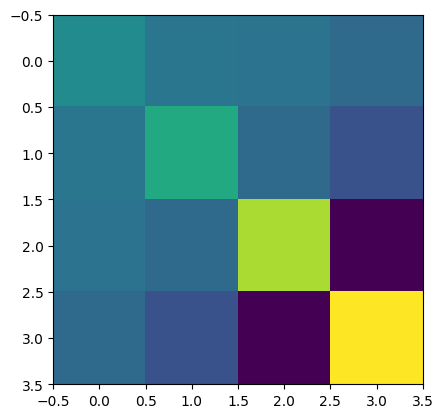

In [28]:
plt.imshow(jac.numpy())

In [71]:
a = np.array([0.0321, 0.0871, 0.2369, 0.6439])
soft = softmax(a).reshape(-1, 1)

In [75]:
aans = np.diagflat(soft) -

In [78]:
np.dot(a, a.T)

0.4793456400000001

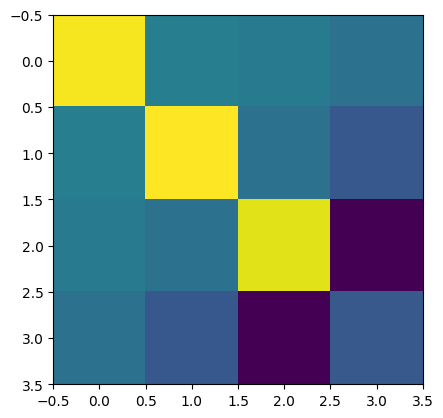

In [77]:
plt.imshow(aans)